In [154]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [155]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [156]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


# EDA

In [157]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [158]:
df.shape

(1000, 14)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [160]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
df.rename(columns={'target': 'HeartDisease'}, inplace=True)

In [163]:
df['HeartDisease'].value_counts()

HeartDisease
1    580
0    420
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

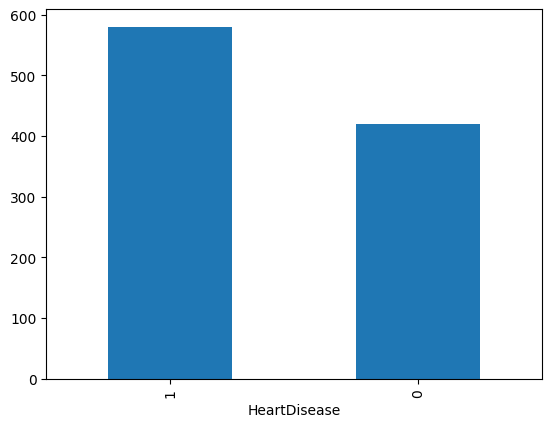

In [164]:
df['HeartDisease'].value_counts().plot(kind = "bar")

In [165]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
HeartDisease         0
dtype: int64

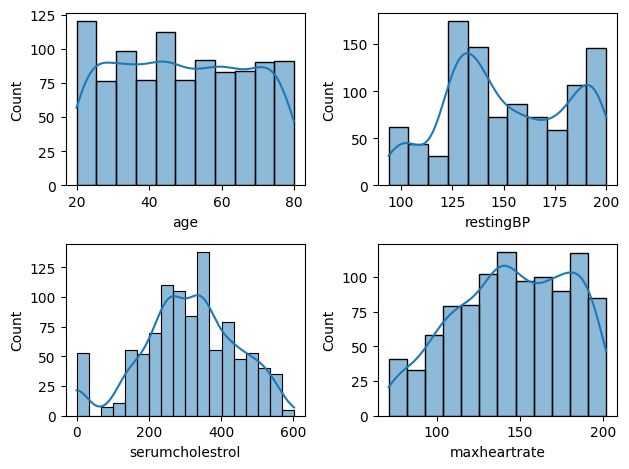

In [166]:
my_list = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate']

for num, value in enumerate(my_list):
    plt.subplot(2,2,num+1)
    sns.histplot(df[value],kde = True)

plt.tight_layout()


In [167]:
df['serumcholestrol'].value_counts()

serumcholestrol
0      53
268    22
354    21
248    19
336    13
       ..
558     1
480     1
218     1
384     1
434     1
Name: count, Length: 344, dtype: int64

## Data Cleaning

In [168]:
ch_mean = df.loc[df['serumcholestrol'] != 0,'serumcholestrol'].mean()
ch_mean

np.float64(328.87750791974656)

In [169]:
df['serumcholestrol'] = df['serumcholestrol'].replace(0,ch_mean)
df['serumcholestrol'] = df['serumcholestrol'].round(2)

In [170]:
slope_mean = df.loc[df['slope'] != 0,'slope'].mean()
slope_mean

np.float64(1.8780487804878048)

In [171]:
df['slope'] = df['slope'].replace(0,slope_mean)
df['slope'] = df['slope'].round(2)
df['slope'].value_counts()

slope
2.00    322
1.00    299
3.00    199
1.88    180
Name: count, dtype: int64

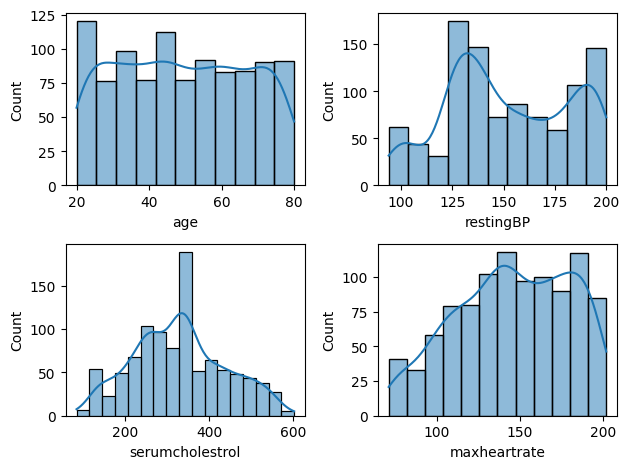

In [172]:
my_list = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate']

for num, value in enumerate(my_list):
    plt.subplot(2,2,num+1)
    sns.histplot(df[value],kde = True)

plt.tight_layout()

In [173]:
df.drop('patientid', axis=1, inplace=True)

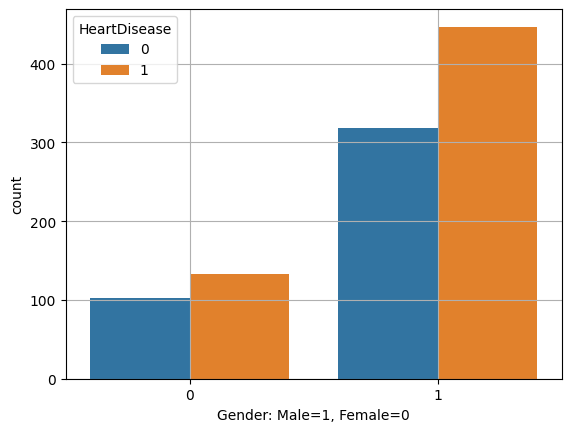

In [174]:
sns.countplot(x = df['gender'],hue = df['HeartDisease'])
plt.grid(True)
plt.xlabel('Gender: Male=1, Female=0')
plt.show()

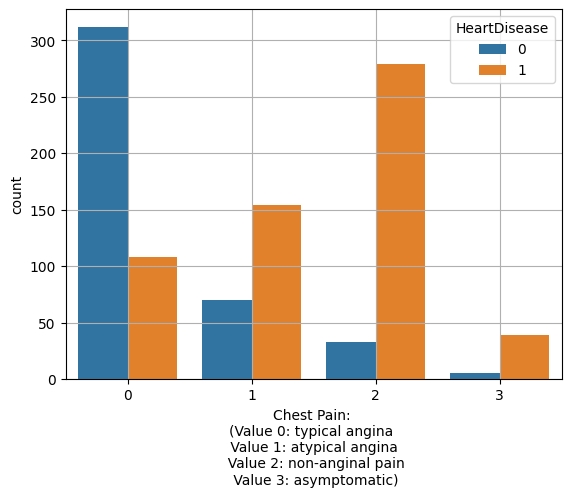

In [175]:
sns.countplot(x = df['chestpain'],hue = df['HeartDisease'])
plt.grid(True)
plt.xlabel("""Chest Pain: 
(Value 0: typical angina 
 Value 1: atypical angina 
  Value 2: non-anginal pain 
 Value 3: asymptomatic)""")
plt.show()


In [176]:
df['chestpain'].value_counts()

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64

<Axes: xlabel='fastingbloodsugar', ylabel='count'>

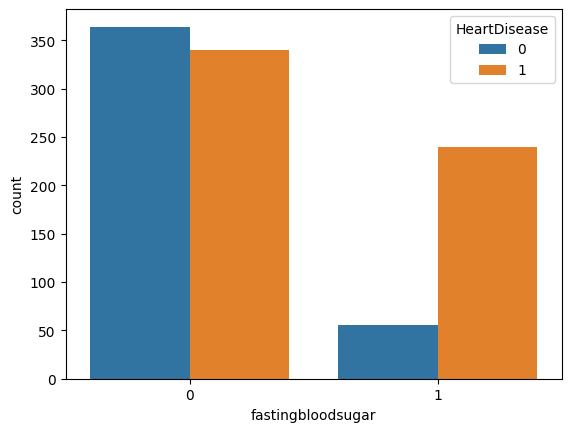

In [177]:
sns.countplot(x = df['fastingbloodsugar'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='serumcholestrol'>

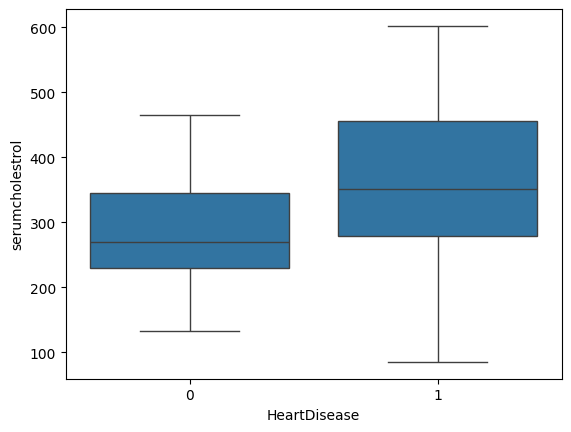

In [178]:
sns.boxplot(x = 'HeartDisease', y = 'serumcholestrol',data = df)

<Axes: xlabel='HeartDisease', ylabel='age'>

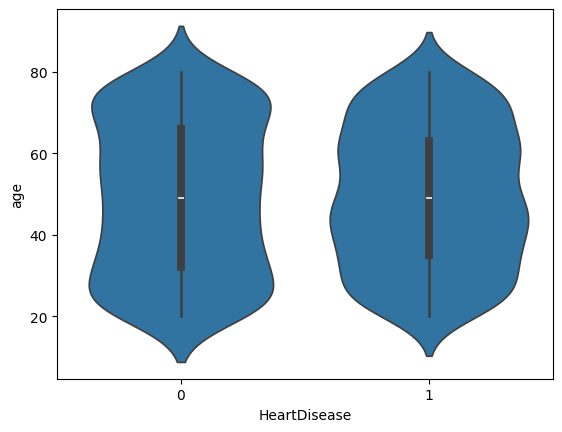

In [179]:
sns.violinplot(x='HeartDisease', y='age', data=df)

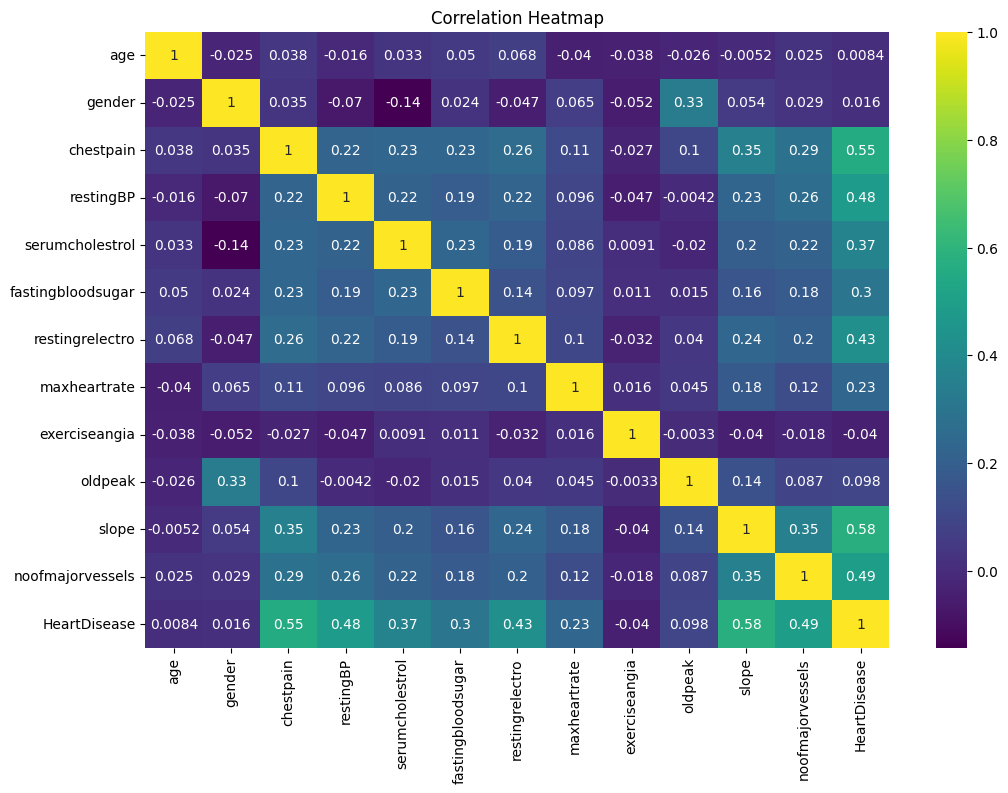

In [180]:

plt.figure(figsize=(12, 8)) # Set the figure size (width, height)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [181]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

## Logistic Regression

In [184]:
model_LogReg = LogisticRegression(max_iter=10000)

In [185]:
model_LogReg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [186]:
y_train_pred = model_LogReg.predict(x_train)

In [187]:
print(f"training accuracy: {accuracy_score(y_train,y_train_pred) * 100:.2f}")

training accuracy: 92.62


In [188]:
y_test_pred = model_LogReg.predict(x_test)

In [189]:
print(f"testing accuracy: {accuracy_score(y_test,y_test_pred)*100:.2f}")

testing accuracy: 92.50


In [190]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        84
           1       0.92      0.95      0.94       116

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [191]:
import joblib

In [192]:
joblib.dump(model_LogReg,'LogReg_heart.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']

## Logistic Regression with Hyperparameter Tunning using GridSearchCV

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
Parameters = {"penalty":['l1', 'l2'],
             "solver":['lbfgs', 'newton-cg', 'newton-cholesky', 'saga'],
             "C":[1,3,5,6],
             "max_iter":[100,300,500]}

In [195]:
LoRGrid = GridSearchCV(LogisticRegression(), param_grid=Parameters, cv=5,scoring='accuracy')

In [196]:
LoRGrid.fit(x_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 3, ...], 'max_iter': [100, 300, ...], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'newton-cg', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [197]:
LoRGrid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [198]:
LoRGrid.best_score_

np.float64(0.915)

In [199]:
test_pred = LoRGrid.predict(x_test)

In [200]:
print(f"testing accuracy Logistic Regression: {accuracy_score(y_test,test_pred)*100:.2f}")

testing accuracy Logistic Regression: 92.50


[[ 75   9]
 [  6 110]]


<Axes: >

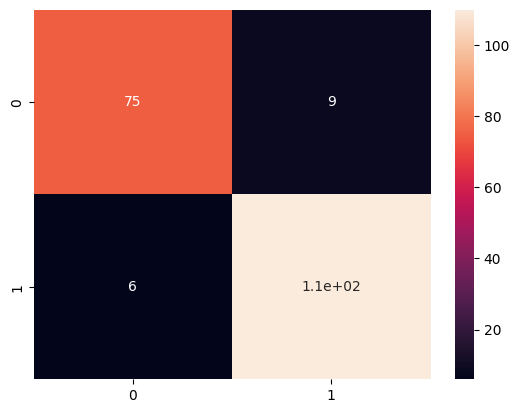

In [201]:
testing_confussion = confusion_matrix(y_test,test_pred)
print(testing_confussion)
sns.heatmap(testing_confussion, annot=True)

In [202]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        84
           1       0.92      0.95      0.94       116

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



## DecisionTreeClassifier with Hyperparameter Tunning using GridSearchCV

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree as plot_tree

In [204]:
para = {"max_depth":[1,2,3,4,5]}

In [205]:
dec_t_c = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dec_t_c,param_grid=para, cv = 5, scoring='accuracy')

In [206]:
grid.fit(x_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [207]:
grid.best_score_

np.float64(0.9462499999999998)

In [208]:
grid.best_params_

{'max_depth': 5}

In [209]:
dec_t_test_pred= grid.predict(x_test)
dec_t_test_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0])

In [210]:
print(f"testing accuracy Decision Tree: {accuracy_score(y_test,dec_t_test_pred)*100:.2f}")

testing accuracy Decision Tree: 97.00


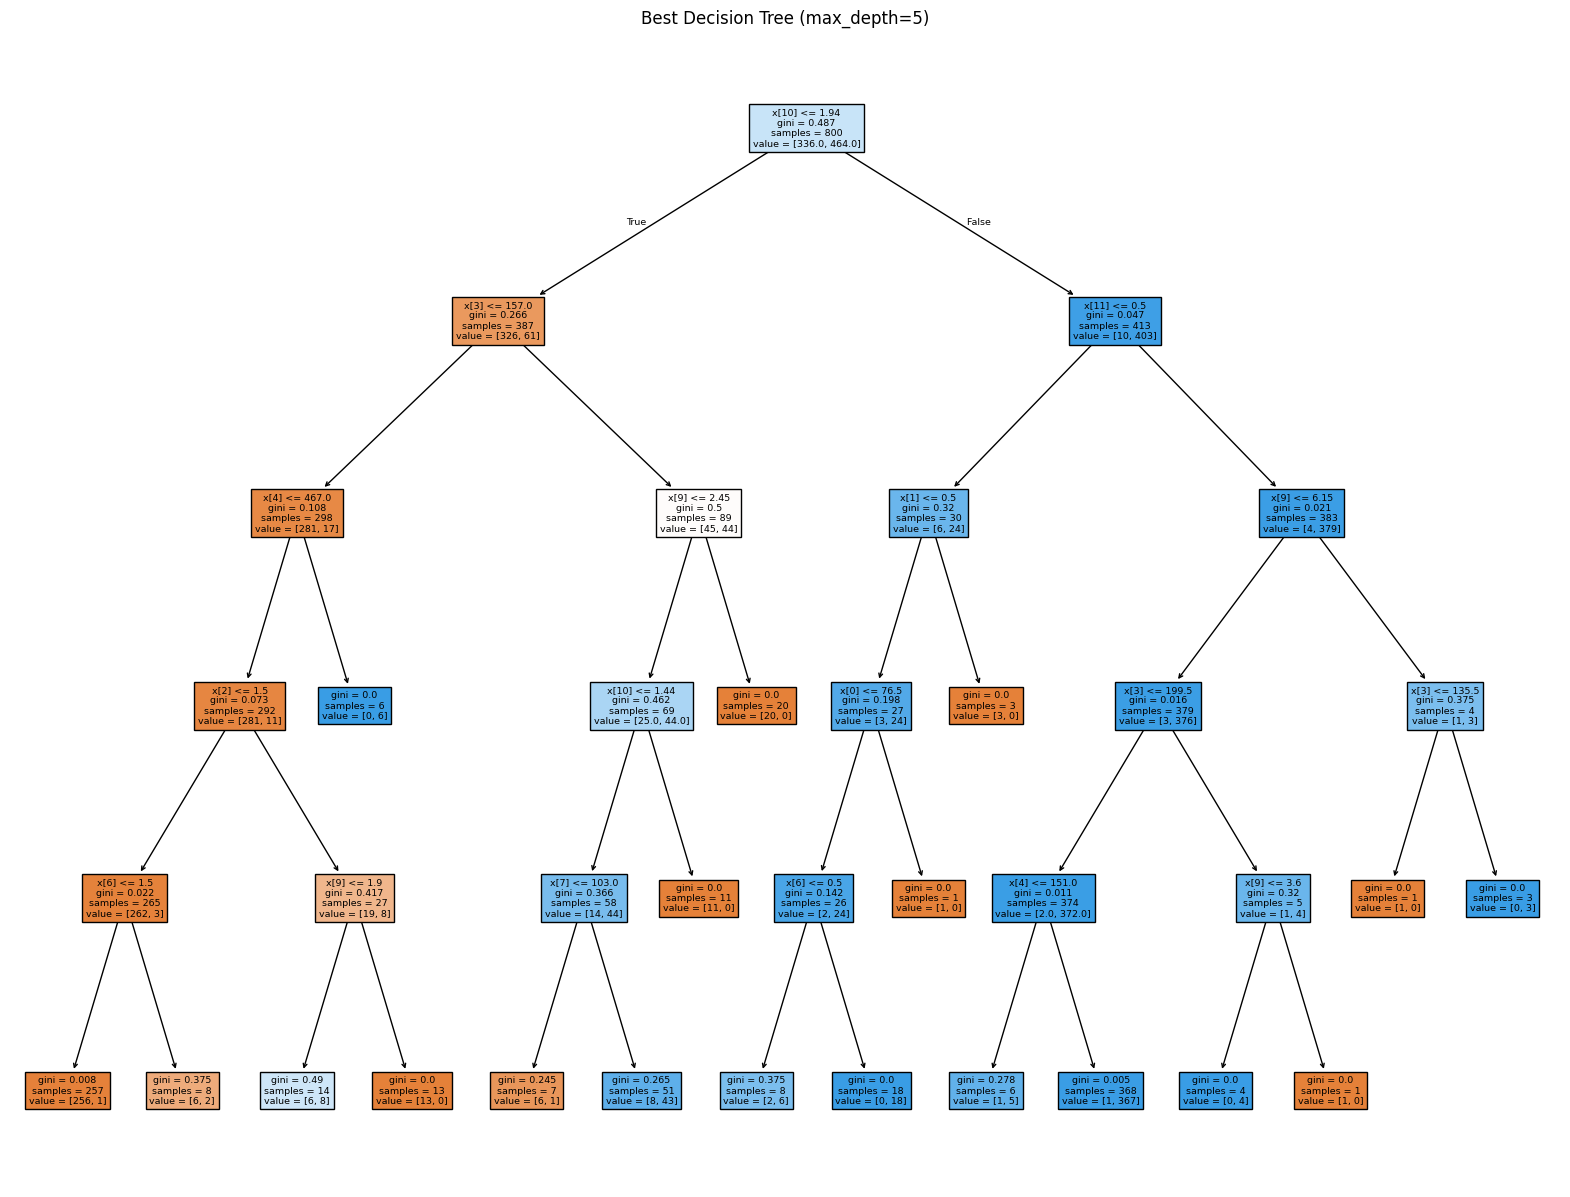

In [211]:
plt.figure(figsize=(20,15))
tree.plot_tree(grid.best_estimator_, filled=True)
plt.title(f"Best Decision Tree (max_depth={grid.best_params_['max_depth']})")
plt.show()